# Universidad Central


##  Curso Transformación Digital a través de la Inteligencia Artificial

# Imágen

In [ ]:
# Cargar y mostrar imagen
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # ¡Esta línea faltaba!
drive.mount('/content/drive')
img_path = '/content/drive/MyDrive/Curso IA/uc.jpg'
img= mpimg.imread(img_path)
# img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # Oculta los ejes
plt.show()

Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Curso IA/uc.jpg'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



###      Importar librerías



In [2]:
#Importación de librerías
import pandas as pd  #Manipulación y análisis de datos estructurados (similar a Excel en Python).
import matplotlib.pyplot as plt # Gráficos de barras, dispersión,...
import seaborn as sns # Visualización estadística
import matplotlib.ticker as ticker
from google.colab import drive #: Integración con Google Drive



Este conjunto de datos contiene precios de viviendas en Nueva York y proporciona información valiosa sobre el mercado inmobiliario de la región. Incluye información como títulos de propiedad, tipos de vivienda, precios, número de dormitorios y baños, superficie de la propiedad, direcciones, estado, áreas administrativas y locales, nombres de calles y coordenadas geográficas.

**https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market**

#  Paleta de colores de latex
**https://latexcolor.com/**


###  Lectura de los datos

In [3]:
# Acceder a google Drive desde Colab

drive.mount('/content/drive')

# Cargar el conjunto de datos
file_path = "/content/drive/MyDrive/NY-House-Dataset.csv"  # Cambiar esta ruta si el archivo está en otro directorio
df = pd.read_csv(file_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  Conjunto de datos

Este conjunto de datos contiene precios de viviendas en Nueva York y proporciona información valiosa sobre el mercado inmobiliario de la región. Incluye información como títulos de propiedad, tipos de vivienda, precios, número de dormitorios y baños, superficie de la propiedad, direcciones, estado, áreas administrativas y locales, nombres de calles y coordenadas geográficas.

**https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market**

-----------------------------------------------------

##  Variables

+ **BROKERTITLE**:  Cargo del corredor

+ **TYPE**: Tipo de casa

+ **PRICE**: Precio de la casa

+ **BEDS**:  Número de dormitorios

+ **BATH**: : Número de baños

+ **PROPERTYSQFT**: Superficie de la propiedad

+ **ADDRESS**: Dirección  de la casa

+ **STATE**: Estado de la casa

+ **MAIN_ADDRESS**: Información de la dirección principal

+ **ADMINISTRATIVE_AREA_LEVEL_2**: Información del área administrativa nivel 2

+ **LOCALITY**: Información de la localidad

+ **SUBLOCALITY**: Información de la sublocalidad

+ **STREET_NAME**: Nombre de la calle

+ **LONG_NAME**: Nombre largo

+ **FORMATTED_ADDRESS**: Dirección formateada

+ **LATITUDE**: Coordenada de latitud de la casa

+ **LONGITUDE**: Coordenada de longitud de la casa


------------------------------



In [11]:
#Ver los 5 primeros registros del conjunto de datos
df.head(5)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


#  Identificación de la Tipología de Variables y Valores Faltantes

In [17]:

data_types = df.dtypes
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

summary = pd.DataFrame({
    "Data Type": data_types,
    "Missing Values": missing_values
}).sort_values(by="Missing Values", ascending=False)

print("Duplicated Rows:", duplicates)
print(summary)



Duplicated Rows: 214
                            Data Type  Missing Values
BROKERTITLE                    object               0
TYPE                           object               0
PRICE                           int64               0
BEDS                            int64               0
BATH                          float64               0
PROPERTYSQFT                  float64               0
ADDRESS                        object               0
STATE                          object               0
MAIN_ADDRESS                   object               0
ADMINISTRATIVE_AREA_LEVEL_2    object               0
LOCALITY                       object               0
SUBLOCALITY                    object               0
STREET_NAME                    object               0
LONG_NAME                      object               0
FORMATTED_ADDRESS              object               0
LATITUDE                      float64               0
LONGITUDE                     float64               0


# Análisis descriptivo


+  Informe general de los datos



In [20]:
print("\nInformación del dataset:")
print(df.info())
# df.shape


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   objec

(4801, 17)

## Estadísticas descriptivas

In [21]:
print("\nEstadísticas descriptivas:")
print(round(df.describe()),5)


Estadísticas descriptivas:
              PRICE    BEDS    BATH  PROPERTYSQFT  LATITUDE  LONGITUDE
count  4.801000e+03  4801.0  4801.0        4801.0    4801.0     4801.0
mean   2.356940e+06     3.0     2.0        2184.0      41.0      -74.0
std    3.135525e+07     3.0     2.0        2377.0       0.0        0.0
min    2.494000e+03     1.0     0.0         230.0      40.0      -74.0
25%    4.990000e+05     2.0     1.0        1200.0      41.0      -74.0
50%    8.250000e+05     3.0     2.0        2184.0      41.0      -74.0
75%    1.495000e+06     4.0     3.0        2184.0      41.0      -74.0
max    2.147484e+09    50.0    50.0       65535.0      41.0      -74.0 5


+ media del área

$$\bar{x} = \dfrac{\sum_{i=1}^{n} x_i}{n} = 2184$$


#  Medidas de Tendencia Central, asimetría y curtosis

In [28]:

numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
statistics = df[numerical_columns].agg(['mean', 'median', 'std', 'var', 'min', 'max', 'skew', 'kurt']).transpose()
statistics.rename(columns={
    "mean": "Mean",
    "median": "Median",
    "std": "Standard Deviation",
    "var": "Variance",
    "min": "Minimum",
    "max": "Maximum",
    "skew": "Skewness",
    "kurt": "Kurtosis"
}, inplace=True)

print("\nMedidas de tendencia central y dispersión:\n", statistics)




Medidas de tendencia central y dispersión:
                       Mean         Median  Standard Deviation      Variance  \
PRICE         2.356940e+06  825000.000000        3.135525e+07  9.831515e+14   
BEDS          3.356801e+00       3.000000        2.602315e+00  6.772042e+00   
BATH          2.373861e+00       2.000000        1.946962e+00  3.790660e+00   
PROPERTYSQFT  2.184208e+03    2184.207862        2.377141e+03  5.650799e+06   
LATITUDE      4.071423e+01      40.726749        8.767557e-02  7.687005e-03   
LONGITUDE    -7.394160e+01     -73.949189        1.010825e-01  1.021767e-02   

                  Minimum       Maximum   Skewness     Kurtosis  
PRICE         2494.000000  2.147484e+09  66.800005  4566.855239  
BEDS             1.000000  5.000000e+01   5.449142    62.229246  
BATH             0.000000  5.000000e+01   7.760220   136.032262  
PROPERTYSQFT   230.000000  6.553500e+04  12.800329   258.555514  
LATITUDE        40.499546  4.091273e+01  -0.088403    -0.564664  
LONGI

+ Medidas de tendencia central: media, mediana

+ Medida de dispersión: varianza, desviación estandar

$$
s^2 = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}
$$

$$
s = \sqrt{\frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}}
$$

#  Análisis Gráfico Univariado y Bivariado

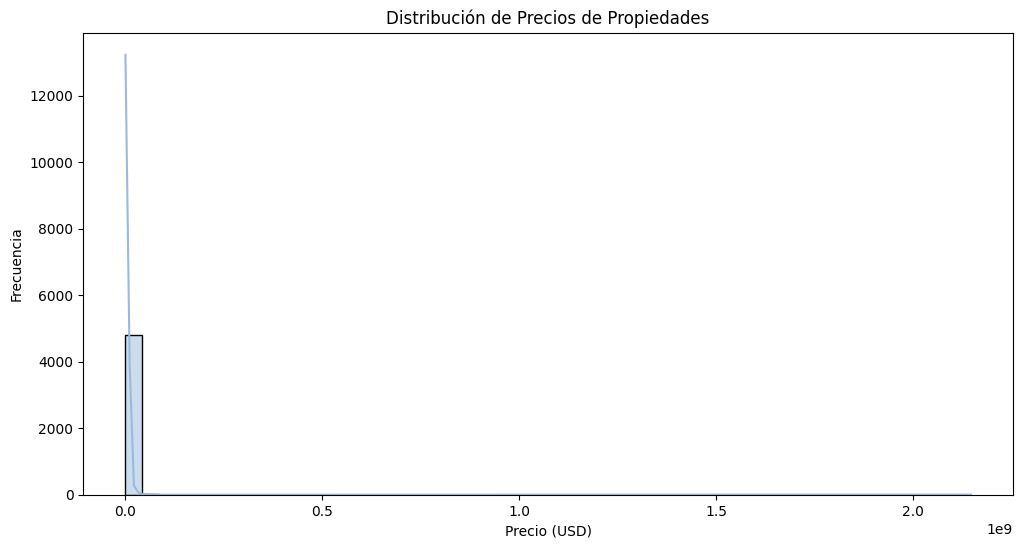

In [29]:
# Análisis de precios
plt.figure(figsize=(12, 6))
sns.histplot(df['PRICE'], bins=50, kde=True, color="#99BADD")
plt.title('Distribución de Precios de Propiedades')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
#plt.xscale('log')  # Usar escala logarítmica por la amplia dispersión de precios
plt.show()

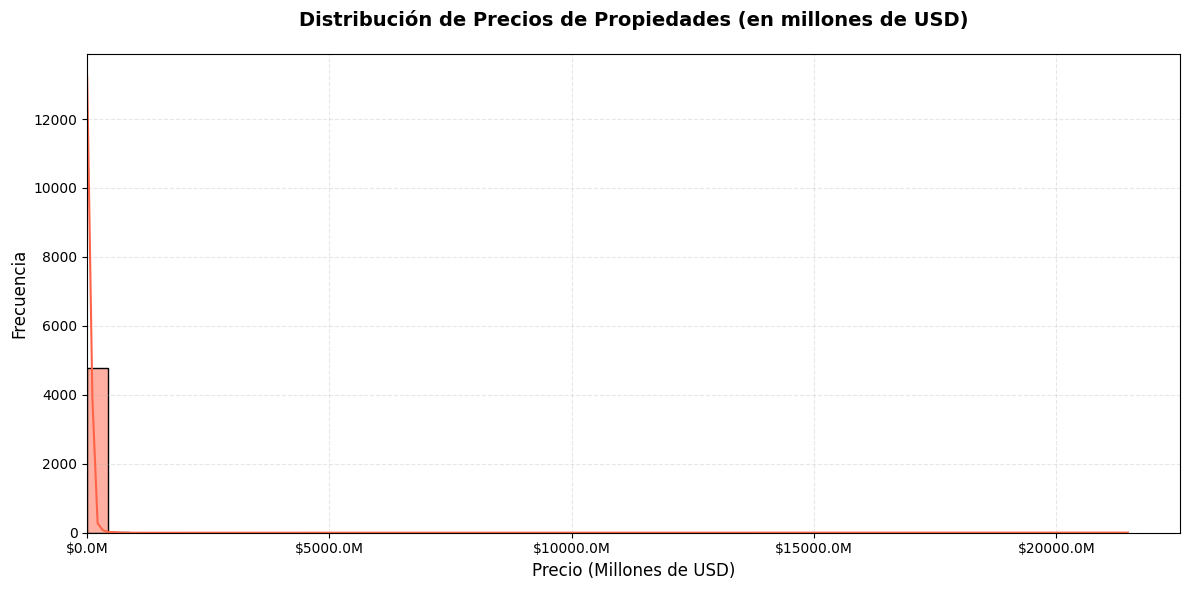

In [31]:
plt.figure(figsize=(12, 6))

# Convertir a millones y crear el histograma
sns.histplot(df['PRICE']/100000, bins=50, kde=True, color='tomato')

# Configurar el formato de los millones en el eje X
def millones_formatter(x, pos):
    return f'${x:.1f}M'

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(millones_formatter))

# Personalización avanzada
plt.title('Distribución de Precios de Propiedades (en millones de USD)',
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Precio (Millones de USD)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Ajustar los límites si hay valores extremos
plt.xlim(left=0)  # Comenzar desde 0

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Top 5 de propiedades más caras

In [33]:
# Top 5 propiedades más caras
top_5_expensive = df.nlargest(5, 'PRICE')[['ADDRESS', 'PRICE', 'TYPE', 'BEDS', 'BATH']]
print("\nTop 5 propiedades más caras:")
print(top_5_expensive)


Top 5 propiedades más caras:
                                                ADDRESS       PRICE  \
304                                  6659-6675 Amboy Rd  2147483647   
1     Central Park Tower Penthouse-217 W 57th New Yo...   195000000   
69                                          4 E 79th St    65000000   
1075                                960 5th Ave Unit 12    60000000   
141                                         9 W 54th St    56000000   

                    TYPE  BEDS       BATH  
304       House for sale     7   6.000000  
1         Condo for sale     7  10.000000  
69    Townhouse for sale     3   2.373861  
1075      Co-op for sale     8   8.000000  
141       House for sale    11  10.000000  


# Análisis por tipo de propiedad

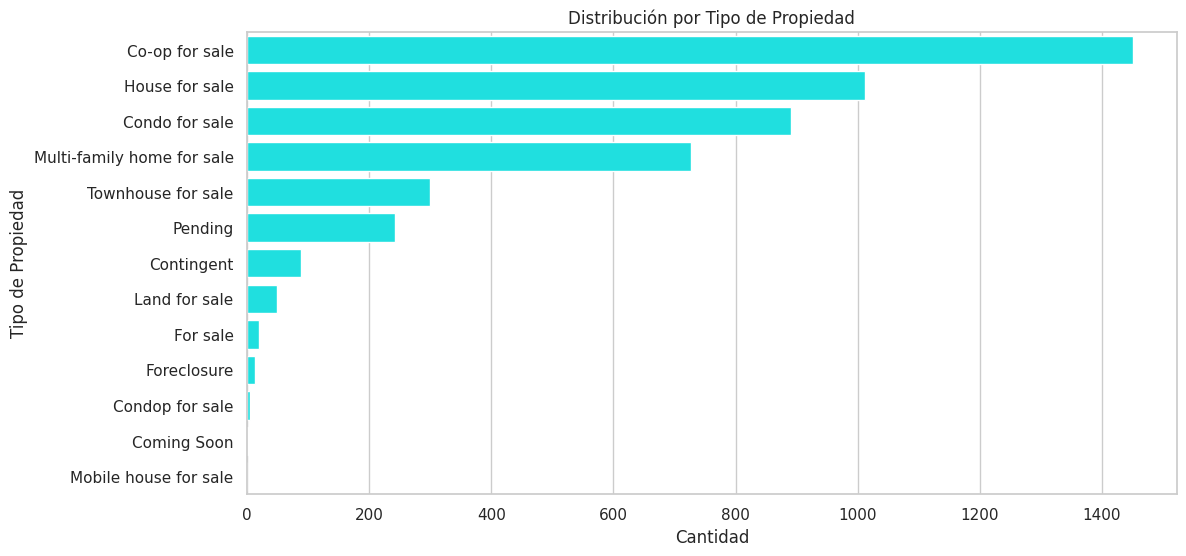

In [ ]:
# Análisis por tipo de propiedad
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='TYPE', order=df['TYPE'].value_counts().index,color='#00FFFF')
plt.title('Distribución por Tipo de Propiedad')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de Propiedad')
plt.show()

# Precio promedio por tipo de propiedad

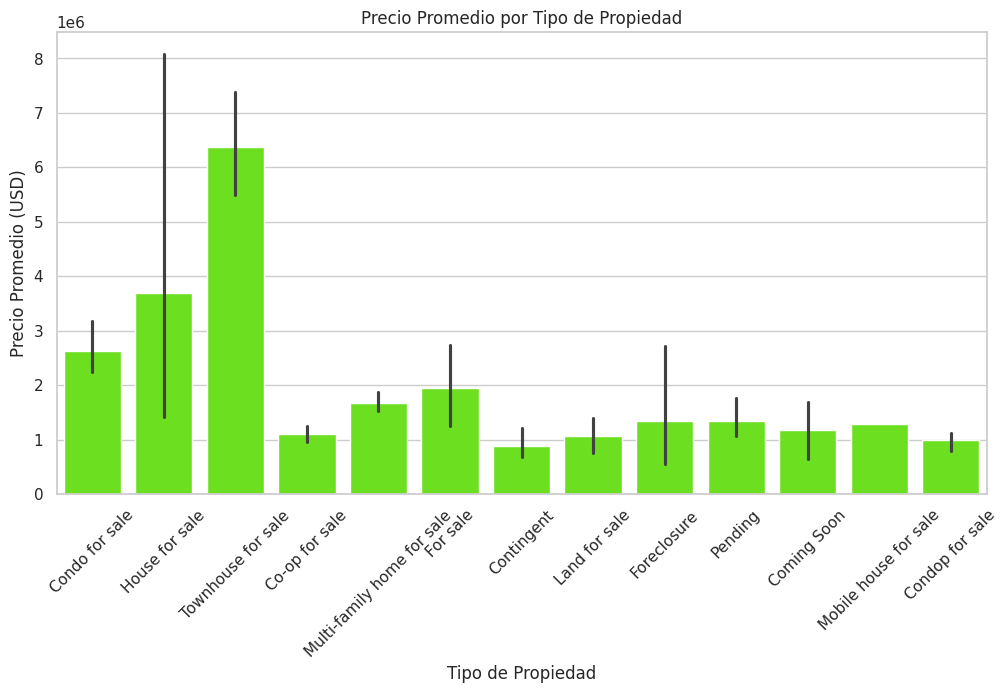

In [ ]:
# Precio promedio por tipo de propiedad
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='TYPE', y='PRICE', estimator='mean',color="#66FF00")
plt.title('Precio Promedio por Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio Promedio (USD)')
plt.xticks(rotation=45)
plt.show()

# Relación entre tamaño y precio

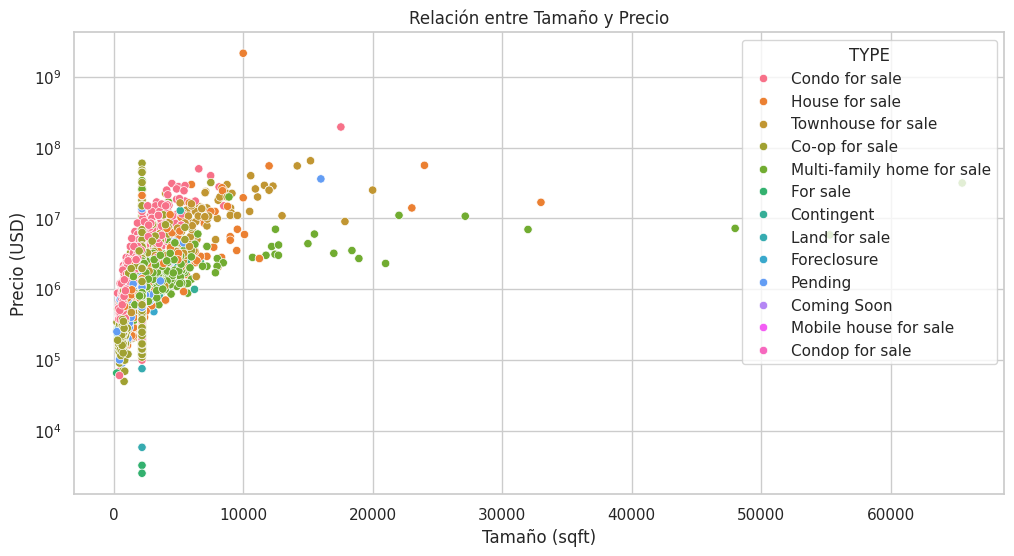

In [ ]:
# Relación entre tamaño y precio
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='PROPERTYSQFT', y='PRICE', hue='TYPE')
plt.title('Relación entre Tamaño y Precio')
plt.xlabel('Tamaño (sqft)')
plt.ylabel('Precio (USD)')
plt.yscale('log')
plt.show()

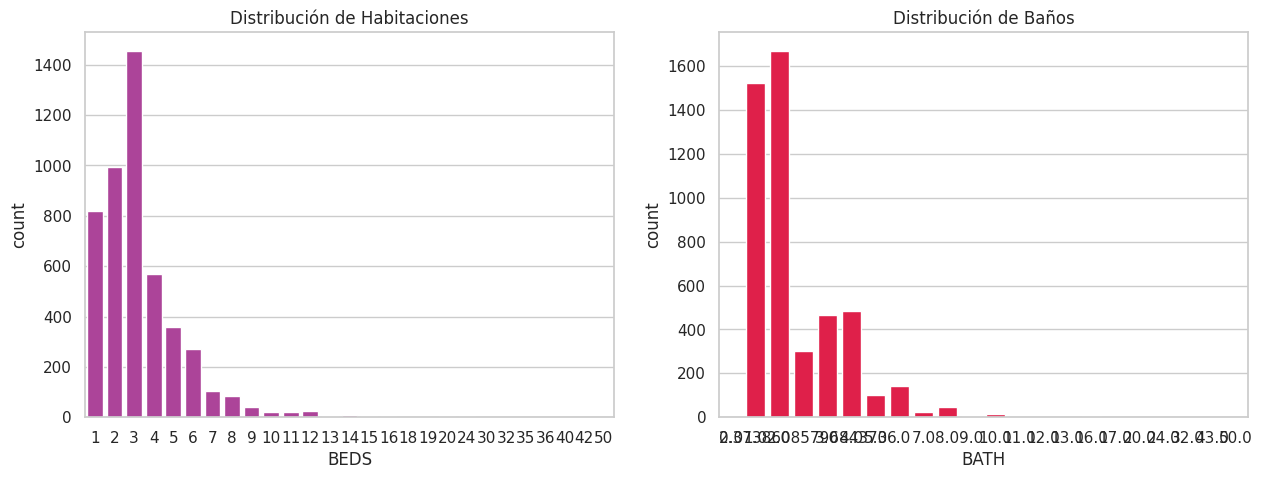

In [ ]:
# Distribución de habitaciones y baños
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data=df, x='BEDS', ax=axes[0], color="#BD33A4")
axes[0].set_title('Distribución de Habitaciones')
sns.countplot(data=df, x='BATH', ax=axes[1], color="#FF0038")
axes[1].set_title('Distribución de Baños')
plt.show()

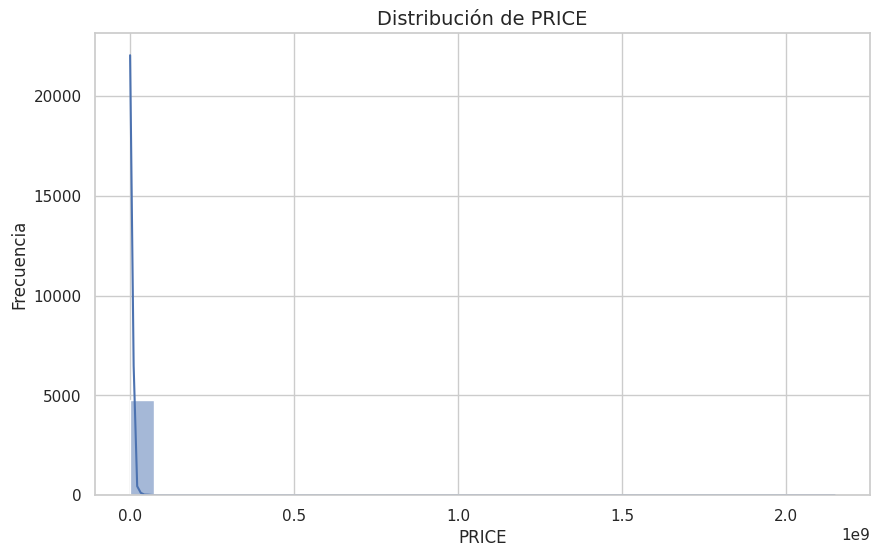

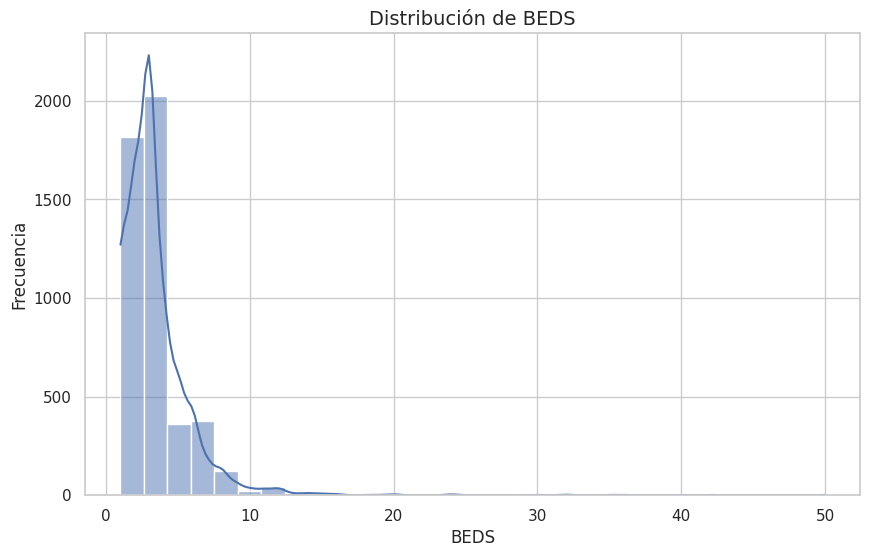

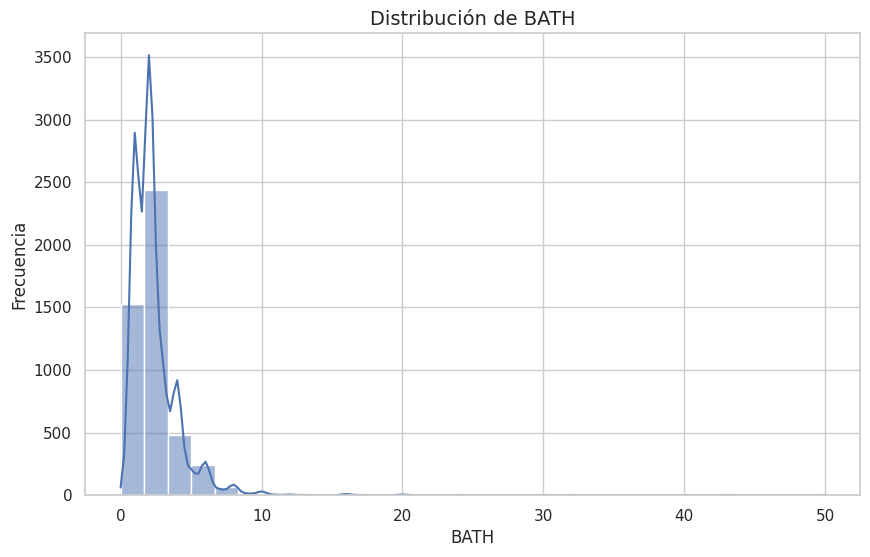

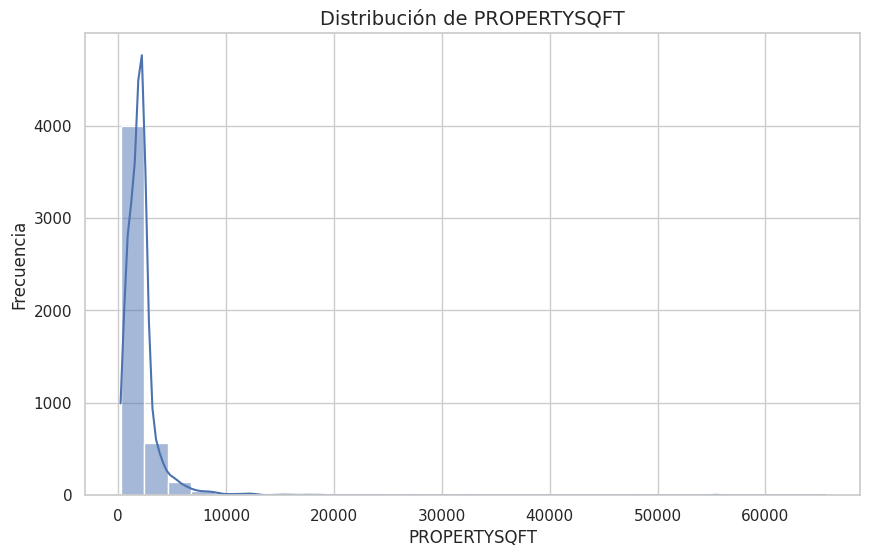

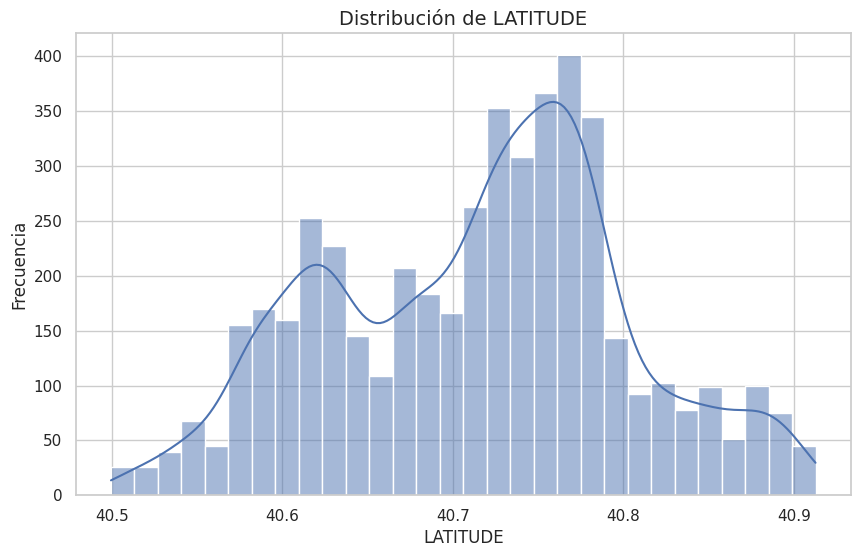

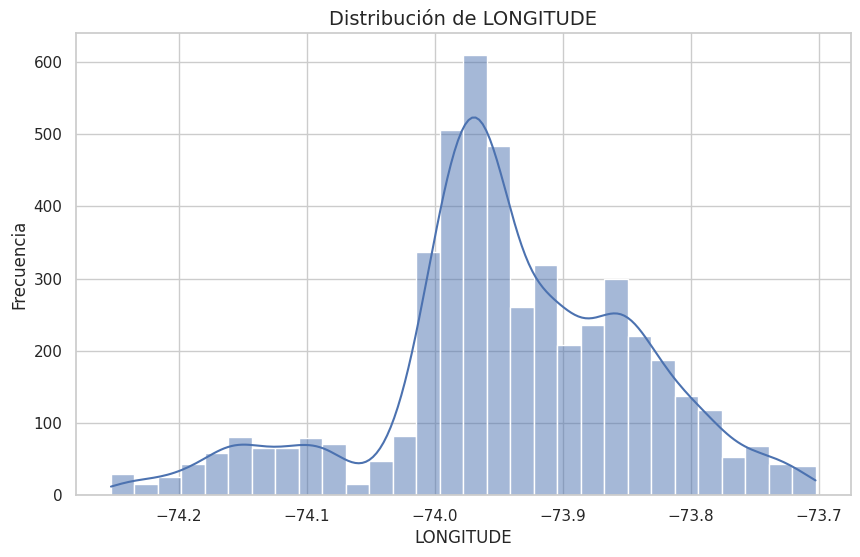

In [ ]:

sns.set(style="whitegrid")

# Distribuciones de variables numéricas
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()



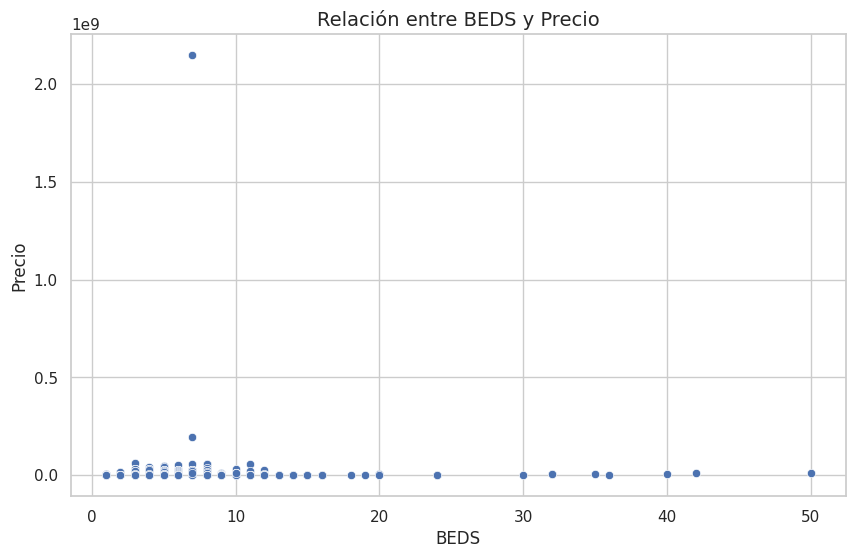

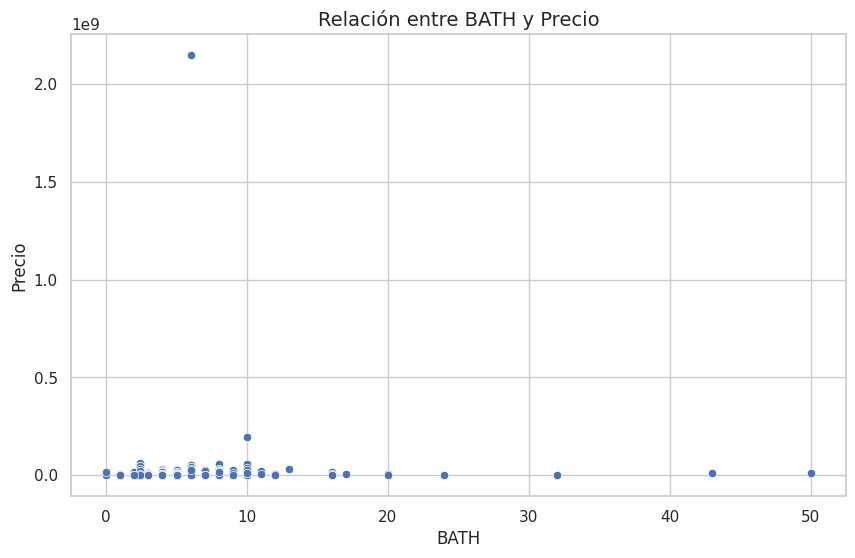

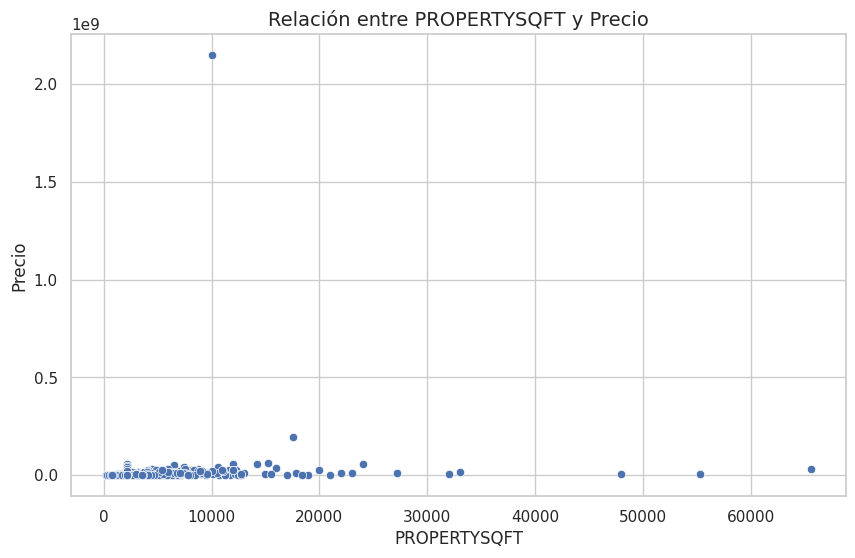

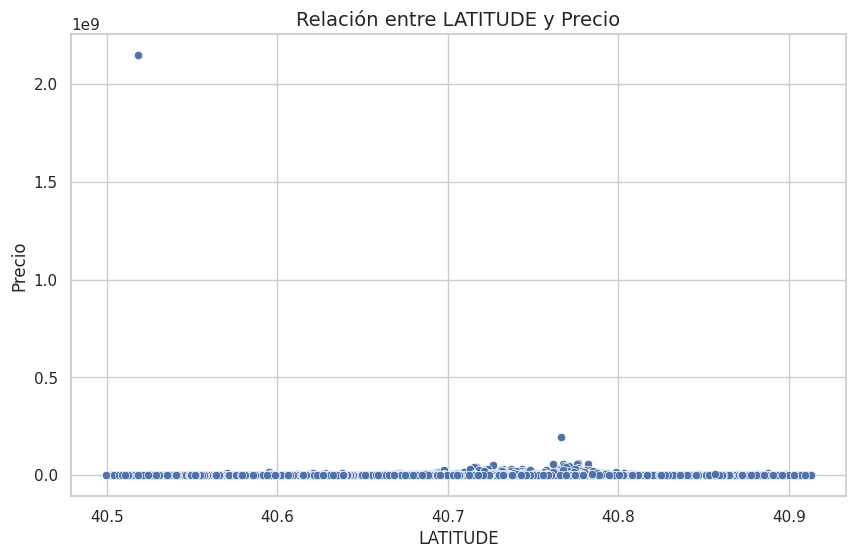

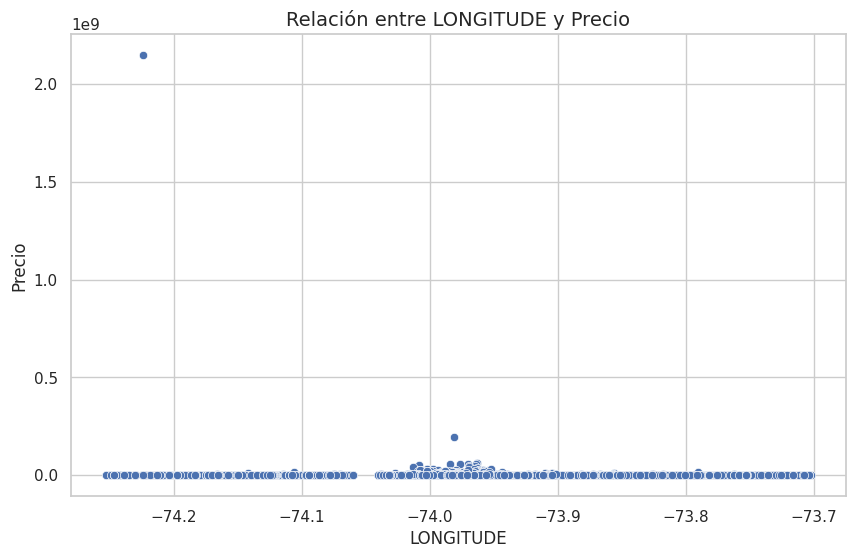

In [ ]:
# Relación con el precio
for col in numerical_columns:
    if col != 'PRICE':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=col, y='PRICE')
        plt.title(f'Relación entre {col} y Precio', fontsize=14)
        plt.xlabel(col)
        plt.ylabel('Precio')
        plt.show()

#   Análisis de Correlación

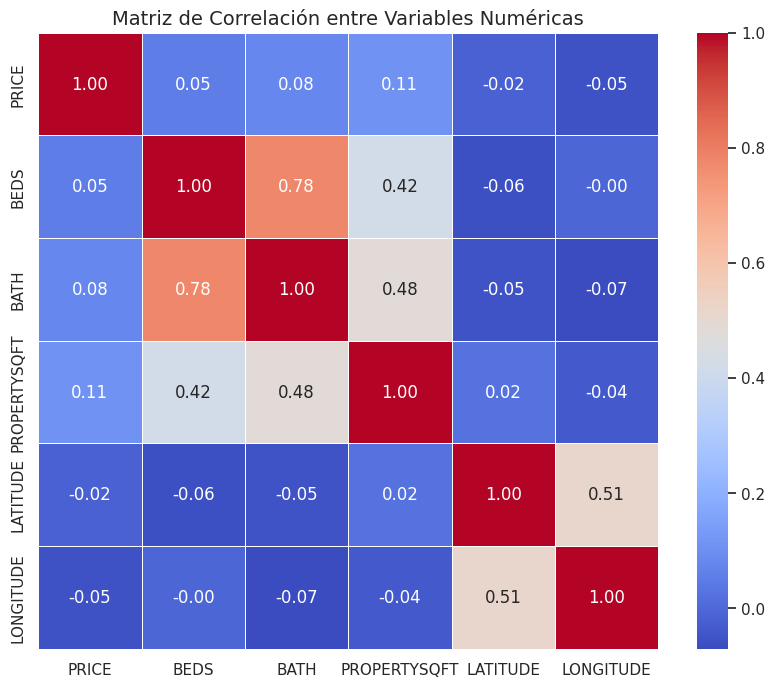

In [ ]:

correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas", fontsize=14)
plt.show()



#  Tratamiento de Valores Atípicos

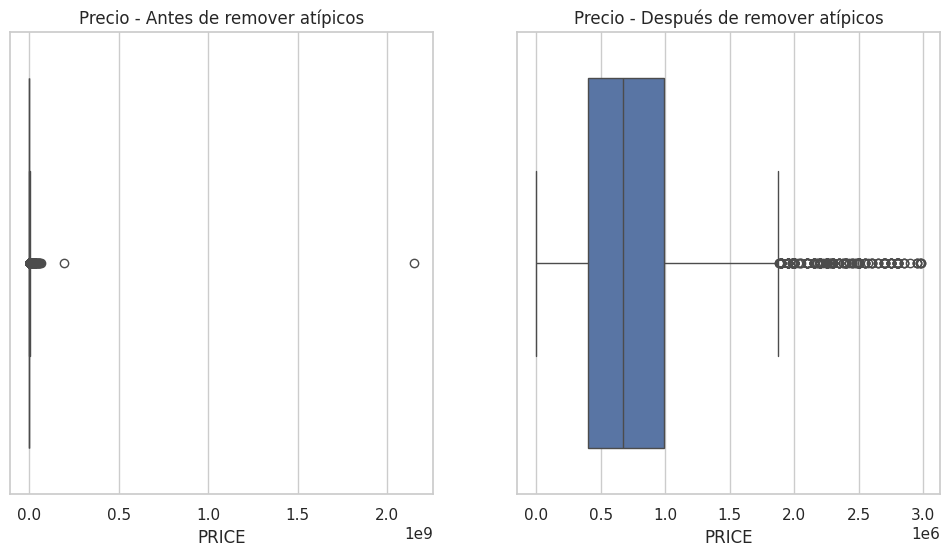

In [ ]:

#valores atípicos
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Inicializar df_cleaned con una copia de df antes de usarlo
df_cleaned = df.copy()  # Crear una copia para no modificar el DataFrame original

df_cleaned = remove_outliers(df_cleaned, 'PRICE')
df_cleaned = remove_outliers(df_cleaned, 'PROPERTYSQFT')
df_cleaned = remove_outliers(df_cleaned, 'BEDS')
df_cleaned = remove_outliers(df_cleaned, 'BATH')




# Visualización antes y después para PRICE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['PRICE'])
plt.title('Precio - Antes de remover atípicos')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['PRICE'])
plt.title('Precio - Después de remover atípicos')
plt.show()

df_clean = df.drop_duplicates()
df_clean = df_clean[(df_clean['PRICE'] < 1e8) & (df_clean['BATH'] <= 10)]

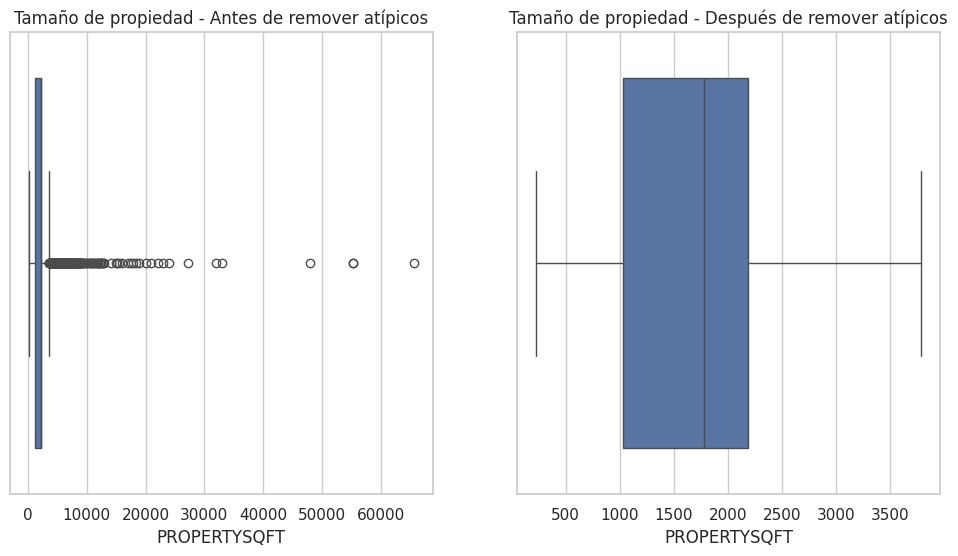

In [ ]:


# Visualización antes y después para PROPERTYSQFT
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['PROPERTYSQFT'])
plt.title('Tamaño de propiedad - Antes de remover atípicos')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['PROPERTYSQFT'])
plt.title('Tamaño de propiedad - Después de remover atípicos')
plt.show()



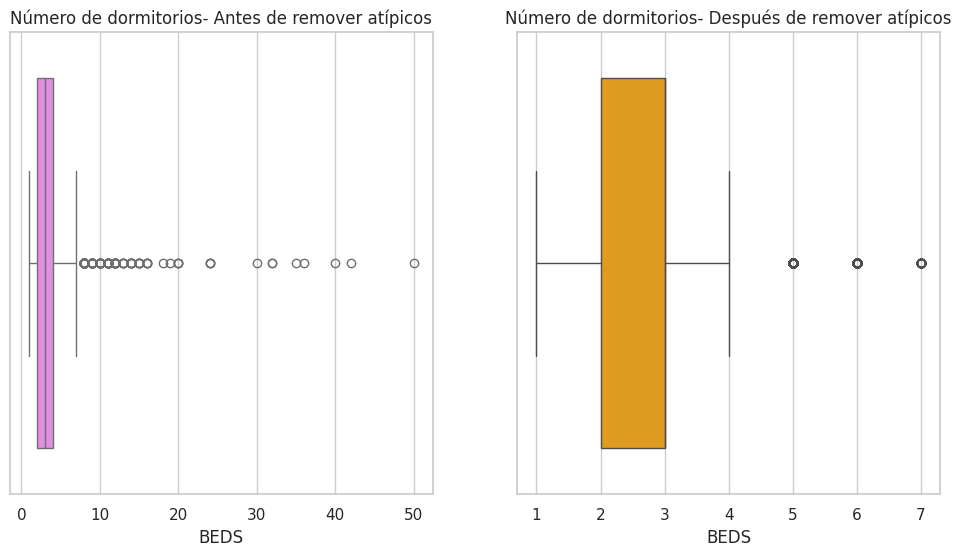

In [ ]:
# Visualización antes y después para BEDS
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['BEDS'], color="violet")
plt.title('Número de dormitorios- Antes de remover atípicos')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['BEDS'], color="orange")
plt.title('Número de dormitorios- Después de remover atípicos')
plt.show()

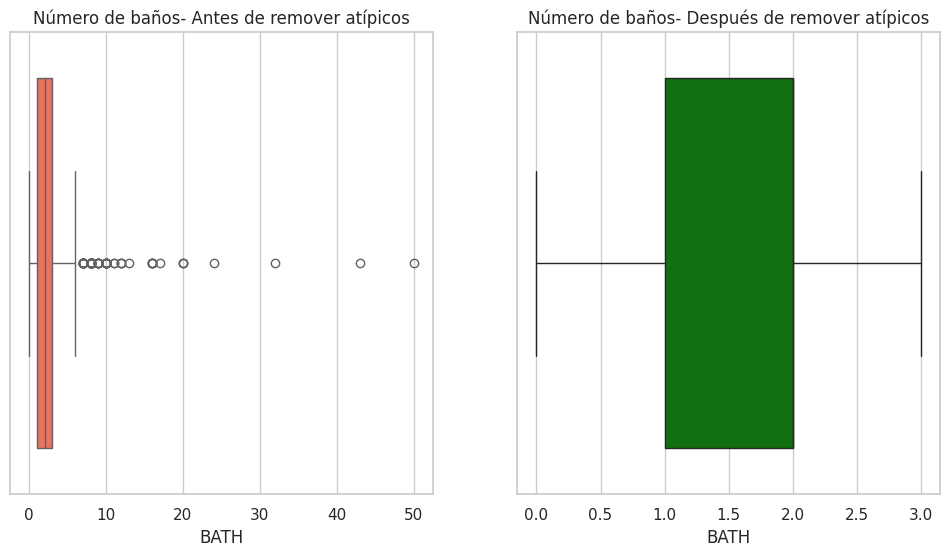

In [ ]:
# Visualización antes y después para BEDS
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['BATH'], color="tomato")
plt.title('Número de baños- Antes de remover atípicos')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['BATH'], color="green")
plt.title('Número de baños- Después de remover atípicos')
plt.show()

# Codificación de Variables Categóricas

In [ ]:

categorical_columns = ['TYPE', 'STATE', 'SUBLOCALITY']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

# Mostrar las primeras filas codificadas
print(df_encoded.head(4))



                                     BROKERTITLE   PRICE  BEDS  BATH  \
0    Brokered by Douglas Elliman  -111 Fifth Ave  315000     2   2.0   
2                         Brokered by Sowae Corp  260000     4   2.0   
3                            Brokered by COMPASS   69000     3   1.0   
6  Brokered by Douglas Elliman - 575 Madison Ave  899500     2   2.0   

   PROPERTYSQFT                  ADDRESS  \
0   1400.000000     2 E 55th St Unit 803   
2   2015.000000         620 Sinclair Ave   
3    445.000000  2 E 55th St Unit 908W33   
6   2184.207862   157 W 126th St Unit 1B   

                                 MAIN_ADDRESS ADMINISTRATIVE_AREA_LEVEL_2  \
0      2 E 55th St Unit 803New York, NY 10022             New York County   
2     620 Sinclair AveStaten Island, NY 10312               United States   
3  2 E 55th St Unit 908W33Manhattan, NY 10022               United States   
6    157 W 126th St Unit 1BNew York, NY 10027                    New York   

          LOCALITY       STREET_

#  Ingeniería de Características

In [ ]:
#  7. Ingeniería de Características
df_encoded['PRICE_PER_SQFT'] = df_encoded['PRICE'] / df_encoded['PROPERTYSQFT']
df_encoded['BATHS_PER_BED'] = df_encoded['BATH'] / df_encoded['BEDS']
df_encoded['BEDS_PER_SQFT'] = df_encoded['BEDS'] / df_encoded['PROPERTYSQFT']

# Visualización de las nuevas variables
print(df_encoded[['PRICE', 'PROPERTYSQFT', 'PRICE_PER_SQFT', 'BATHS_PER_BED', 'BEDS_PER_SQFT']].head())

    PRICE  PROPERTYSQFT  PRICE_PER_SQFT  BATHS_PER_BED  BEDS_PER_SQFT
0  315000   1400.000000      225.000000       1.000000       0.001429
2  260000   2015.000000      129.032258       0.500000       0.001985
3   69000    445.000000      155.056180       0.333333       0.006742
6  899500   2184.207862      411.819779       1.000000       0.000916
8  265000    750.000000      353.333333       1.000000       0.001333


# Modelos de regresión


## Importación de librerías

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Función para entrenar, evaluar, graficar modelos y cálculo de métricas

In [ ]:
# Función para entrenar, evaluar y graficar modelos
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, title):
    """
    Entrena un modelo de regresión, evalúa su rendimiento y grafica predicciones vs. valores reales.

    Parámetros:
        model: Modelo de sklearn a entrenar.
        X_train, X_test: características de entrenamiento y prueba.
        y_train, y_test: Objetivo de entrenamiento y prueba.
        title: Título para el gráfico.

    Retorna:
        Diccionario con métricas de evaluación.
    """
    # Entrenamiento del modelo
    model.fit(X_train, y_train)

    # Predicciones
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Cálculo de métricas
    metrics = {
        "MAE_Train": mean_absolute_error(y_train, y_pred_train),
        "RMSE_Train": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "R2_Train": r2_score(y_train, y_pred_train),
        "MAE_Test": mean_absolute_error(y_test, y_pred_test),
        "RMSE_Test": np.sqrt(mean_squared_error(y_test, y_pred_test)),
        "R2_Test": r2_score(y_test, y_pred_test)
    }

      # Gráfico de predicciones vs valores reales
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6, edgecolor='k', label='Datos')
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             '--r',
             linewidth=2,
             label='Línea ideal')
    plt.xlabel("Precio Real", fontsize=12)
    plt.ylabel("Precio Predicho", fontsize=12)
    plt.title(f"{title} - Predicción vs Real", fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    return metrics

 #  Preparación de los Datos



#  Preparación de los Datos

In [ ]:


# Variables objetivo y predictoras para la base original
X_original = df[['BEDS', 'BATH', 'PROPERTYSQFT']]
y_original = df['PRICE']

# Variables para la base tratada (sin atípicos, codificada y con nuevas características)
X_processed = df_encoded.drop(columns=['PRICE', 'ADDRESS', 'MAIN_ADDRESS', 'BROKERTITLE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'FORMATTED_ADDRESS', 'LONG_NAME', 'STREET_NAME'], errors='ignore')
y_processed = df_encoded['PRICE']

# División train-test
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, test_size=0.2, random_state=44)
X_train_proc, X_test_proc, y_train_proc, y_test_proc = train_test_split(X_processed, y_processed, test_size=0.2, random_state=44)

#  Modelos y Evaluación

+  Regresión tradicional (Mínimos Cuadrados Ordinarios)

+  Regresión Lasso (Regularización $L_1$)

+  Regresión Ridge (Regularización $L_2$)

-----------------------------------------------



###  Regresión tradicional

+  Mínimos Cuadrados Ordinarios - OLS

Función objetivo:

$$\min_{\beta} \sum_{i=1}^n (y_i-(\beta_0+\beta_1x_{i1}+\beta_2 x_{i2}+  \cdots+ \beta_{p}x_{ip}))^2$$

#### Propiedades :

+  No considera multicolinealidad

+  Solución analítica cerrada:

$$\hat{\pmb{\beta}}=(\pmb{X}'\pmb{X})^{-1}\pmb{X}'\pmb{y}$$

+  Alta varianza cuando $p \approx n$


---------------------------------------------


###  Regresión Lasso

+  Función objetivo:

$$\min_{\beta} \sum_{i=1}^n (y_i-(\beta_0+\beta_1x_{i1}+\beta_2 x_{i2}+  \cdots+ \beta_{p}x_{ip}))^2 +\lambda(|\beta_1|+ |\beta_2|+  \cdots +|\beta_p|)$$

#### Propiedades :

+  Penalización absoluta ($L1$) sobre los coeficientes

+  No tiene solución analítica cerrada (se resuelve por optimización convexa)

+  Puede producir coeficientes exactamente cero (selección de variables)

+  Comportamiento discontinuo con variables correlacionadas

------------------------------

###  Regresión Ridge

+  Función objetivo:

$$\min_{\beta} \sum_{i=1}^n (y_i-(\beta_0+\beta_1x_{i1}+\beta_2 x_{i2}+  \cdots+ \beta_{p}x_{ip}))^2 +\lambda(\beta_1^2+ \beta_2^2+  \cdots +\beta_p^2)$$

#### Propiedades :

+  Penalización cuadrática ($L2$) sobre los coeficientes

+  Solución analítica cerrada:

$$\hat{\pmb{\beta}}^{ridge}=(\pmb{X}'\pmb{X}+\lambda\pmb{I})^{-1}\pmb{X}'\pmb{y}$$

+ Nunca anula coeficientes exactamente

$$\beta_j \to 0  \hspace{5mm}  \text{cuando}  \hspace{5mm}  \lambda \to \infty$$

+ Maneja bien multicolinealidad

------------------------------

###  Propiedades Estadísticas

| Modelo | Sesgo  |Varianza|
|:-----:|:-----:|:-------:|
|  OLS	 | Bajo	  | Alta   |
| Ridge	 | Medio	| Media-Baja|
| Lasso  |	Medio-Alto	|Media|


###  Ventajas y desventajas

|Criterio	|Regresión Tradicional	| Lasso (L1)	| Ridge (L2)|
|:-------:|:---------------------:|:----------:|:---------:|
Manejo de Multicolinealidad|	❌ Pobre	|✅ Bueno (selecciona 1 variable)	|✅ Excelente (distribuye pesos)
Selección de Variables |	❌ No aplica	|✅ Sí (coeficientes = 0)	|❌ No
Estabilidad |	❌ Inestable con muchas variables	|✅ Estable |	✅ Muy estable
Interpretabilidad	|✅ Fácil	|✅ Modelos más simples	|❌ Menos interpretable
Rendimiento Predictivo |	❌ Sensible a overfitting|	✅ Bueno con datos procesados	|✅ Mejor en general

# Modelos

In [ ]:
models = {
    "Regresión Lineal Múltiple": LinearRegression(),
    "Lasso (alpha=0.1)": Lasso(alpha=0.1),
    "Ridge (alpha=1.0)": Ridge(alpha=1.0)
}

results = []

In [ ]:
import statsmodels.api as sm
from sklearn.base import clone



# Función modificada para incluir summary completo
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, title):
    # Entrenar modelo scikit-learn para métricas
    sklearn_model = clone(model)
    sklearn_model.fit(X_train, y_train)
    y_pred_train = sklearn_model.predict(X_train)
    y_pred_test = sklearn_model.predict(X_test)

    # Métricas de evaluación
    metrics = {
        "MAE_Train": mean_absolute_error(y_train, y_pred_train),
        "RMSE_Train": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "R2_Train": r2_score(y_train, y_pred_train),
        "MAE_Test": mean_absolute_error(y_test, y_pred_test),
        "RMSE_Test": np.sqrt(mean_squared_error(y_test, y_pred_test)),
        "R2_Test": r2_score(y_test, y_pred_test),
    }

    # Generar summary con statsmodels (solo para modelos compatibles)
    if isinstance(model, LinearRegression):
        X_train_sm = sm.add_constant(X_train)
        modelo_sm = sm.OLS(y_train, X_train_sm).fit()
        print(f"\n{'='*50}\nSummary completo para {title}\n{'='*50}")
        print(modelo_sm.summary())
    elif isinstance(model, (Lasso, Ridge)):
        print(f"\n{'='*50}\nResumen para {title} (Lasso/Ridge)\n{'='*50}")
        print("Nota: statsmodels no soporta summary directo para Lasso/Ridge")
        # Access coefficients from the fitted model (sklearn_model)
        coef_df = pd.DataFrame({
            'Variable': X_train.columns,
            'Coeficiente': sklearn_model.coef_,  # Changed to sklearn_model
            'Importancia': np.abs(sklearn_model.coef_)  # Changed to sklearn_model
        }).sort_values('Importancia', ascending=False)
        print(coef_df)
        print(f"\nIntercepto: {sklearn_model.intercept_:.2f}") # Changed to sklearn_model

    return metrics

for name, model in models.items():
    metrics = train_and_evaluate_model(model, X_train_orig, X_test_orig, y_train_orig, y_test_orig, f"{name} - Datos Originales")
    results.append({"Modelo": name + " - Original", **metrics})



Summary completo para Regresión Lineal Múltiple - Datos Originales
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     18.60
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           5.63e-12
Time:                        20:13:47   Log-Likelihood:                -72126.
No. Observations:                3840   AIC:                         1.443e+05
Df Residuals:                    3836   BIC:                         1.443e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

# Entrenamiento y evaluación con la base original

In [ ]:

for name, model in models.items():
    metrics = train_and_evaluate_model(model, X_train_orig, X_test_orig, y_train_orig, y_test_orig, f"{name} - Datos Originales")
    results.append({"Modelo": name + " - Original", **metrics})






Summary completo para Regresión Lineal Múltiple - Datos Originales
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     18.60
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           5.63e-12
Time:                        20:13:47   Log-Likelihood:                -72126.
No. Observations:                3840   AIC:                         1.443e+05
Df Residuals:                    3836   BIC:                         1.443e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

# Entrenamiento y evaluación con la base tratada

In [ ]:
# Convert columns with 'object' dtype to numerical types
for col in X_train_proc.select_dtypes(include=['object']).columns:
    X_train_proc[col] = pd.to_numeric(X_train_proc[col], errors='coerce')
    X_test_proc[col] = pd.to_numeric(X_test_proc[col], errors='coerce')

# Fill NaN values (if any) with a suitable strategy, e.g., mean or median
X_train_proc = X_train_proc.fillna(X_train_proc.mean())
X_test_proc = X_test_proc.fillna(X_test_proc.mean())

# Ensure all columns are numeric by explicitly converting them to float
# This ensures that even if some values are non-numeric (e.g., strings), they will be handled gracefully (converted to NaN and then filled with 0)
for col in X_train_proc.columns:
    X_train_proc[col] = X_train_proc[col].astype(float)
    X_test_proc[col] = X_test_proc[col].astype(float)

for name, model in models.items():
    metrics = train_and_evaluate_model(model, X_train_proc, X_test_proc, y_train_proc, y_test_proc, f"{name} - Datos Procesados")
    results.append({"Modelo": name + " - Procesado", **metrics})


Summary completo para Regresión Lineal Múltiple - Datos Procesados
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     75.17
Date:                Fri, 04 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:13:47   Log-Likelihood:                -39364.
No. Observations:                2924   AIC:                         7.936e+04
Df Residuals:                    2608   BIC:                         8.125e+04
Df Model:                         315                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.168e+13, tolerance: 8.517e+10
  model = cd_fast.enet_coordinate_descent(



Resumen para Lasso (alpha=0.1) - Datos Procesados (Lasso/Ridge)
Nota: statsmodels no soporta summary directo para Lasso/Ridge
                                      Variable   Coeficiente   Importancia
331                              BEDS_PER_SQFT -7.270596e+07  7.270596e+07
247                         STATE_Ny, NY 11221  8.478526e+05  8.478526e+05
25          STATE_Bedford Stuyvesant, NY 11206  7.000257e+05  7.000257e+05
5                             TYPE_Coming Soon -6.136387e+05  6.136387e+05
158                  STATE_Manhattan, NY 10006 -4.785758e+05  4.785758e+05
..                                         ...           ...           ...
277                     STATE_Queens, NY 11426  0.000000e+00  0.000000e+00
253  STATE_Prospect Lefferts Gardens, NY 11225  0.000000e+00  0.000000e+00
259                     STATE_Queens, NY 11105  0.000000e+00  0.000000e+00
288           STATE_Roosevelt Island, NY 10044  0.000000e+00  0.000000e+00
30                STATE_Belle Harbor, NY 11694  

#  Métricas de comparación

In [ ]:

results_df = pd.DataFrame(results)
print(results_df)

                                  Modelo     MAE_Train    RMSE_Train  \
0   Regresión Lineal Múltiple - Original  2.436990e+06  3.475923e+07   
1           Lasso (alpha=0.1) - Original  2.436990e+06  3.475923e+07   
2           Ridge (alpha=1.0) - Original  2.436984e+06  3.475923e+07   
3   Regresión Lineal Múltiple - Original  2.436990e+06  3.475923e+07   
4           Lasso (alpha=0.1) - Original  2.436990e+06  3.475923e+07   
5           Ridge (alpha=1.0) - Original  2.436984e+06  3.475923e+07   
6  Regresión Lineal Múltiple - Procesado  1.161442e+05  1.699917e+05   
7          Lasso (alpha=0.1) - Procesado  1.161434e+05  1.699929e+05   
8          Ridge (alpha=1.0) - Procesado  1.224767e+05  1.767675e+05   

   R2_Train      MAE_Test     RMSE_Test   R2_Test  
0  0.014337  1.734481e+06  4.155594e+06 -0.428205  
1  0.014337  1.734481e+06  4.155594e+06 -0.428205  
2  0.014337  1.734479e+06  4.155577e+06 -0.428193  
3  0.014337  1.734481e+06  4.155594e+06 -0.428205  
4  0.014337  1.7344

# Exportar a HTML

In [ ]:
from google.colab import files
import os

# Ruta CORRECTA del notebook en Google Drive (asegúrate de que coincida con tu estructura)
notebook_path = '/content/drive/MyDrive/Colab Notebooks/Ejemplo_Viviendas.ipynb'

# Verifica si el archivo existe antes de convertirlo
if not os.path.exists(notebook_path):
    raise FileNotFoundError(f"El archivo no existe en la ruta: {notebook_path}")

# 1. Convertir el notebook a HTML
!jupyter nbconvert --to html '{notebook_path}'

# 2. Obtener la ruta del archivo HTML generado (auto-detecta el nombre)
html_filename = os.path.splitext(os.path.basename(notebook_path))[0] + '.html'
html_path = f'/content/{html_filename}'

# 3. Descargar el archivo (con verificación)
if os.path.exists(html_path):
    files.download(html_path)
    print(f"✅ Archivo descargado: {html_filename}")
else:
    print(f"❌ Error: No se pudo generar {html_filename}")

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Ejemplo_Viviendas.ipynb to html
[NbConvertApp] Writing 384004 bytes to /content/drive/MyDrive/Colab Notebooks/Ejemplo_Viviendas.html
❌ Error: No se pudo generar Ejemplo_Viviendas.html


**Gracias:**
dbermudezr1@ucentral.edu.co